In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
min_age = df['Age'].mean() - 3*df['Age'].std()
max_age = df['Age'].mean() + 3*df['Age'].std()
df = df[(df['Age'] > min_age) & (df['Age'] < max_age)]

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          528
Embarked         2
dtype: int64

In [17]:
(df.isnull().sum() / df.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          74.157303
Embarked        0.280899
dtype: float64

## we can do data cleaning later ,
currently its important to focus on transformation

In [81]:
df1 =  pd.read_csv("./train.csv", usecols = ['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [82]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

C:\Users\Soura\AppData\Local\Temp\ipykernel_21024\3169937590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)


In [93]:
x = df1.iloc[:,1:3]
y = df1.iloc[: , 0]

In [94]:
X_train,X_test,y_train,y_test = train_test_split(x,y ,  test_size=0.2 ,random_state = 42)

Text(0.5, 1.0, 'Age')

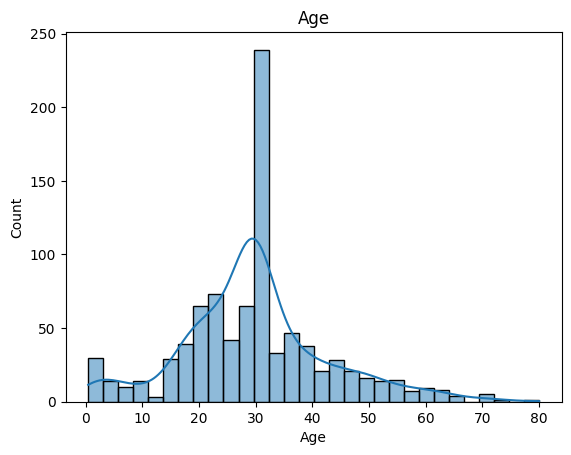

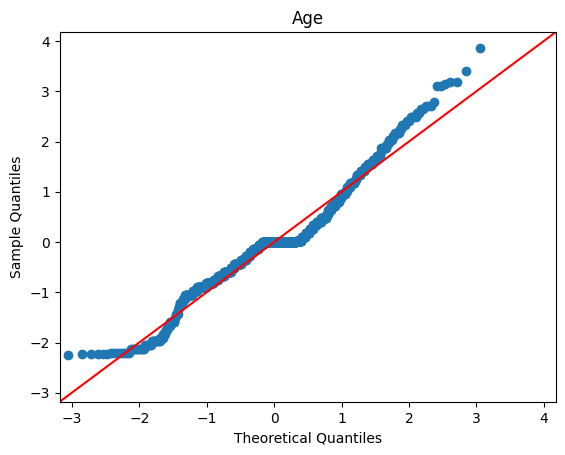

In [95]:
sns.histplot(df1['Age'], kde = True)
plt.title('Age')
sm.qqplot(df1['Age'], line = '45', fit = True)
plt.title('Age')

Text(0.5, 1.0, 'Fare')

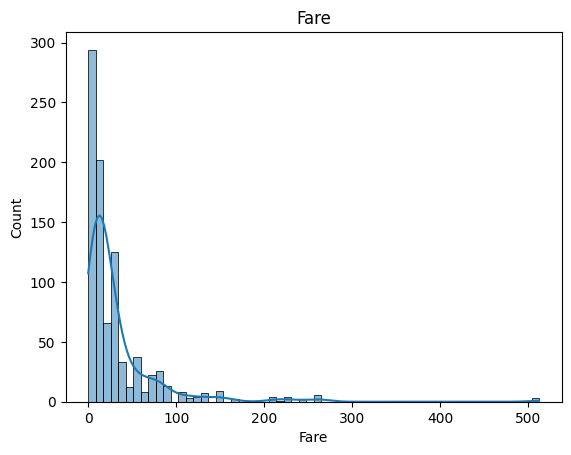

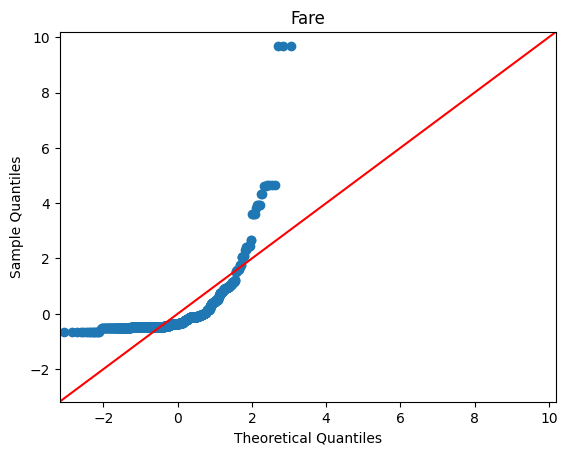

In [96]:
sns.histplot(df1['Fare'], kde = True)
plt.title('Fare')
sm.qqplot(df1['Fare'], line = '45', fit = True)
plt.title('Fare')

In [97]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.09733529909665506

In [100]:
trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [101]:
lr.fit(X_train_transformed,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
y_pred_new = lr.predict(X_test_transformed)

In [105]:
r2_score(y_test,y_pred_new)

0.17607527097871523

Text(0.5, 1.0, 'Fare')

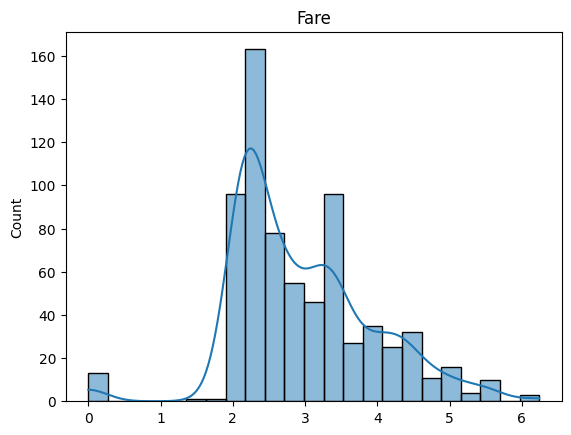

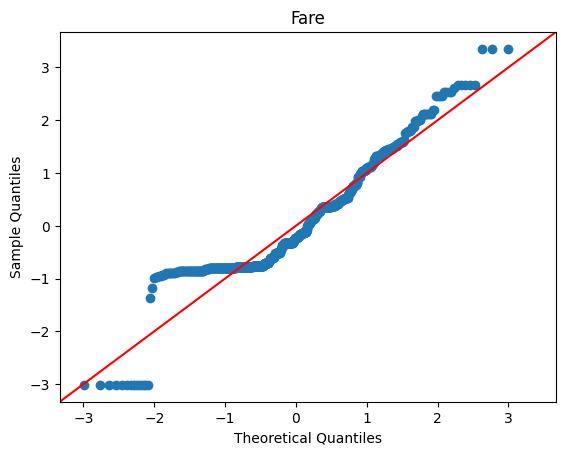

In [115]:
sns.histplot(X_train_transformed[:, 0], kde = True)
plt.title('Fare')
sm.qqplot(X_train_transformed[:, 0], line = '45', fit = True)
plt.title('Fare')